In [ ]:
from data.data_provider.binance import BinanceClient

df = BinanceClient().get_ohlc()
df.head()

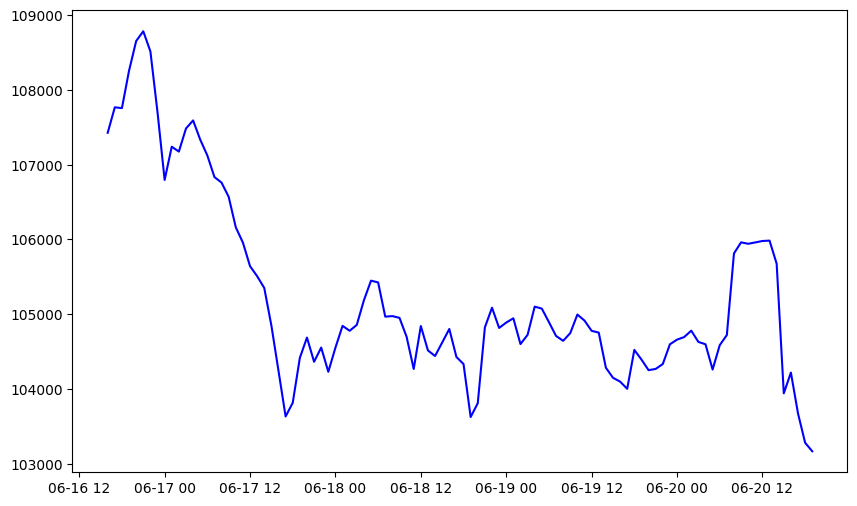

In [14]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(df['time'], df['open'], color='b', label="Longueur du serpent")
plt.show() 

In [ ]:
from data.transforms import build_compose, Returns, SlidingWindowSupervised
from data.dataset import TimeSeriesDataset

import torch

x = torch.tensor(df[['open', 'high', 'low']].values, dtype=torch.float32)
y = torch.tensor(df['close'].values, dtype=torch.float32)

# Converting to Returns
x = Returns()(x)
y = Returns()(y)

# Converting data to slicing window formated data
x, y = SlidingWindowSupervised(window_size=10, horizon=5, multi_step=True)(x=x, y=y)

print(x.shape)
print(y.shape)

print(y)